<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: 0; padding: 30px; font-size: 22px; ">ANALYSE DES VENTES EN LIGNE LIBRAIRIES LAPAGE</h1>
</div>

### OBJECTIF DE CE NOTEBOOK

Analyser les différents indicateurs et chiffres clés de l’entreprise afin d'aider le comité de direction à prendre des décisions concernant la stratégie de l'entreprise par rapport aux ventes en ligne.

Cette analyse portera sur les différents indicateurs de vente concernant la composition du chiffre d'affaires et son évolution ,mais également l'évolution des transactions, du nombre de produits vendus et le détail par catégories , du nombre de clients. 


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [306]:
#Importation de la librairie Pandas
import pandas as pd

In [307]:
#Importation de la librairie Matplotlib
import matplotlib.pyplot as plt

In [308]:
#Importation de la librairie numpy
import numpy as np

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [310]:
#Importation du fichier customers.csv 
df_customers = pd.read_csv("customers.csv", sep=';')
#Importation du fichier products.xlsx
df_products = pd.read_csv("products.csv", sep =';')
#Importation du fichier Transactions.xlsx
df_Transactions = pd.read_csv("Transactions.csv", sep =';')

C:\Users\remym\AppData\Local\Temp\ipykernel_3024\1195375578.py:6: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Transactions = pd.read_csv("Transactions.csv", sep =';')


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier customers.csv</h3>
</div>

In [313]:
#Consulter le nombre de colonnes , La nature des données dans chacune des colonnes, et le nombre de valeurs présentes dans chacune des colonnes
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


*Il n'y a aucune valeur nulle dans le dataframe df_customers, les 3 colonnes contiennent 8621 valeurs.
Les colonnes client_id et sex sont de type object et la colonne birth de type integer.*

In [315]:
#Afficher les 5 premières lignes de la table
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier customers.csv</h3>
</div>

## **LES IDENTIFIANTS CLIENTS**  ##
### **Vérification de l'unicité des identifiants clients:** 

In [318]:
#Vérifier si il y a des valeurs en doublon dans la colonne client_id
df_customers.duplicated(subset=['client_id']).value_counts()

False    8621
Name: count, dtype: int64

*Il n'y a pas de valeurs présente en double dans la colonne client_id, chaque valeur de cette colonne est donc unique.*

## **LE GENRE DES CLIENTS**  ##
### **Vérification des données concernant le sexe des clients:** 

In [321]:
df_customers.sex.describe()

count     8621
unique       2
top          f
freq      4490
Name: sex, dtype: object

In [322]:
df_customers.sex.value_counts()

sex
f    4490
m    4131
Name: count, dtype: int64

*Nos clients ont 2 genres différents (f ou m) et on compte 4490 clientes et 4131 clients dans la table customers.*

## **L'ANNEE DE NAISSANCE DES CLIENTS**  ##
### **Vérification des données concernant l'année de naissance des clients:** 

In [325]:
df_customers.birth.describe()

count    8621.000000
mean     1978.275606
std        16.917958
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64

* Il y a  8621 clients qui ont renseigné leur année de naissance, et l'année de naissance moyenne est 1978.
* Le client le plus agé est né en 1929 quand le client le plus jeune est de 2004.
* L'année de naissance médianne est 1979, et la majorité des clients sont nés entre 1966 et 1992.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier products.csv</h3>
</div>

In [328]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


*Il n'y a aucune valeur nulle dans le dataframe df_products, les 3 colonnes contiennent 3286 valeurs.
La colonne id_prod est de type object, la colonne price de type float et la colonne categ de type integer.*

In [330]:
#Afficher les 5 premières lignes de la table
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier products.csv</h3>
</div>

## **LES IDENTIFIANTS PRODUITS**  ##
### **Vérification de l'unicité des identifiants produits :**

In [333]:
#Vérifier si il y a des valeurs en doublon dans la colonne id_prod
df_products.duplicated(subset=['id_prod']).value_counts()

False    3286
Name: count, dtype: int64

*Il n'y a pas de valeur présente en double dans la colonne id_prod, chaque valeur de cette colonne est donc unique.*

## **LES PRIX**  ##
### **Vérification des données concernant le prix des produits:** 

In [336]:
df_products.price.describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

* Il y a  3286 prix de produits renseignés, et le prix moyen d'un produit est de 21,86€.
* Le prix le plus bas est en 0.62€ quand le prix le plus élevé est de 300€.
* Le prix médian s'élève à 13.07€,et la majorité des prix sont compris entre 6.99 et 22.99€.

## **LES CATEGORIES DE PRODUITS**  ##
### **Vérification des données concernant la catégorie des produits:**

In [339]:
df_products.categ.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3286 entries, 0 to 3285
Series name: categ
Non-Null Count  Dtype
--------------  -----
3286 non-null   int64
dtypes: int64(1)
memory usage: 25.8 KB


*Il y a bien 3286 valeurs dans la colonne categ.*

In [341]:
df_products.categ.value_counts()

categ
0    2308
1     739
2     239
Name: count, dtype: int64

* Il y a 3 types de catégorie de produits renseignés: 0, 1, et 2.
* Il y a 2308 produits recencés en categorie 0.
* Il y a 739 produits recencés en categorie 1.
* Il y a 239 produits recencés en categorie 2.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier Transactions.csv</h3>
</div>

In [344]:
#Consulter le nombre de colonnes , La nature des données dans chacune des colonnes, et le nombre de valeurs présentes dans chacune des colonnes
df_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


*Il n'y a un grand nombre de valeurs nulles dans le dataframe df_Transactions, chacunes des 4 colonnes contiennent 687534 valeurs non nulles.
Les 4 colonnes id_prod, date, session_id, et client_id sont toutes de type object.*

In [346]:
#Afficher les 5 premières lignes de la table
df_Transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [347]:
#Identification des lignes où l'id_prod est nul.
df_transactions_valeurs_manquantes = df_Transactions[df_Transactions.id_prod.isnull()]
df_transactions_valeurs_manquantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361041 entries, 687534 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_prod     0 non-null      object
 1   date        0 non-null      object
 2   session_id  0 non-null      object
 3   client_id   0 non-null      object
dtypes: object(4)
memory usage: 13.8+ MB


*Il y a 361041 lignes comportant des informations manquantes dans la dataframe Transactions et ces lignes ne comportent aucune autre donnée dans les 4 colonnes du dataframe.*

In [349]:
#Suppression des lignes où l'intégralité des valeurs sont manquantes
df_Transactions.drop(df_Transactions[df_Transactions.id_prod.isnull()].index, axis = 0, inplace = True)

In [350]:
#Vérification
df_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


*Les lignes ne comportant aucune valeurs ont été supprimé du data frame df_Transactions.*

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.1 - Analyse exploratoire de chaque variable du fichier Transactions.csv</h3>
</div>

## **LES IDENTIFIANTS PRODUITS**  ##
### **Vérification des données concernant les identifiants des produits:**

In [354]:
#Vérifier si il y a des valeurs en doublon dans la colonne id_prod
df_Transactions.duplicated(subset=['id_prod']).value_counts()

True     684269
False      3265
Name: count, dtype: int64

*Il y a 3266 valeurs uniques dans le dataframe df_Transactions, et 1045309 doublons.*

## **LES DATES DE VENTES**  ##
### **Vérification des données concernant les dates de ventes des produits:**

In [357]:
df_Transactions.date.describe()

count                         687534
unique                        687419
top       2021-10-06 21:29:59.752585
freq                               2
Name: date, dtype: object

*Il y a 687419 dates uniques sur les 687534 dates présentes dans le dataframe Transactions*

In [359]:
#Les données étant de type object il est préférable de les convertir au format datetime afin de pouvoir les exploiter 
pd.to_datetime(df_Transactions['date'], errors='coerce')

0        2021-03-01 00:01:07.843138
1        2021-03-01 00:02:26.047414
2        2021-03-01 00:02:38.311413
3        2021-03-01 00:04:54.559692
4        2021-03-01 00:05:18.801198
                    ...            
687529   2023-02-28 23:49:03.148402
687530   2023-02-28 23:51:29.318531
687531   2023-02-28 23:53:18.929676
687532   2023-02-28 23:58:00.107815
687533   2023-02-28 23:58:30.792755
Name: date, Length: 687534, dtype: datetime64[ns]

In [360]:
df_Transactions['date'] = pd.to_datetime(df_Transactions['date'], errors='coerce')
print(df_Transactions['date'].dtype)

datetime64[ns]


In [361]:
#Date la plus ancienne
df_Transactions.date.min()

Timestamp('2021-03-01 00:01:07.843138')

In [362]:
#Date la plus récente
df_Transactions.date.max()

Timestamp('2023-02-28 23:58:30.792755')

*Les dates de transactions sont comprises entre le 01/03/2021 et le 28/02/2023 soit une période de 2 ans.*

## **LES ID DE SESSIONS**  ##
### **Vérification des données concernant les différents identifiants de sessions:**

In [365]:
df_Transactions.session_id.describe()

count       687534
unique      345505
top       s_118668
freq            14
Name: session_id, dtype: object

*Il y a 345505 valeurs uniques sur les 687534 valeurs non_nulles présentes dans la colonne session_id du dataframe Transactions.*

## **LES IDENTIFIANTS CLIENTS**  ##
### **Vérification des données concernant les différents identifiants clients:**

In [368]:
df_Transactions.client_id.describe()

count     687534
unique      8600
top       c_1609
freq       25586
Name: client_id, dtype: object

*Il y a 8600 identifiants client uniques sur les 687534 valeurs non_nulles présentes dans la colonne client_id du dataframe Transactions.*

In [370]:
#Vérifier si il y a des valeurs en doublon dans la colonne client_id
df_Transactions.duplicated(subset=['client_id']).value_counts()

True     678934
False      8600
Name: count, dtype: int64

*Il y a 678 934 valeurs présentes en doubles dans la colonne client_id du dataframe Transactions.*

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Joindre des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Jointure entre les dataframes df_customers et df_Transactions</h3>
</div>

In [374]:
#Fusion des fichiers df_customers et df_Transactions
df_customers_transactions = pd.merge(df_customers, df_Transactions, on='client_id', how='outer', indicator=True)
df_customers_transactions.head()

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_1,m,1955,0_1470,2021-06-11 21:02:39.382765,s_47346,both
1,c_1,m,1955,0_513,2021-07-21 22:41:38.769525,s_65433,both
2,c_1,m,1955,0_1186,2021-07-25 12:17:34.446678,s_66947,both
3,c_1,m,1955,0_1448,2021-07-26 17:37:29.438136,s_67467,both
4,c_1,m,1955,0_1475,2021-07-27 10:30:00.293075,s_67769,both


In [375]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
df_customers_transactions._merge.value_counts()

_merge
both          687534
left_only         21
right_only         0
Name: count, dtype: int64

In [376]:
#Informations sur le data frame df_customers_transactions
df_customers_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687555 entries, 0 to 687554
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   687555 non-null  object        
 1   sex         687555 non-null  object        
 2   birth       687555 non-null  int64         
 3   id_prod     687534 non-null  object        
 4   date        687534 non-null  datetime64[ns]
 5   session_id  687534 non-null  object        
 6   _merge      687555 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 32.1+ MB


*Il y a 687534 lignes avec des correspondances, et 21 lignes uniquement présentes dans df_customers.*

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Jointure entre les dataframes df_customers_transactions et df_products</h3>
</div>

In [379]:
df_ctp = pd.merge(df_customers_transactions, df_products, on='id_prod', how='outer', indicator = '_merge2')
df_ctp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687576 entries, 0 to 687575
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   687555 non-null  object        
 1   sex         687555 non-null  object        
 2   birth       687555 non-null  float64       
 3   id_prod     687555 non-null  object        
 4   date        687534 non-null  datetime64[ns]
 5   session_id  687534 non-null  object        
 6   _merge      687555 non-null  category      
 7   price       687555 non-null  float64       
 8   categ       687555 non-null  float64       
 9   _merge2     687576 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(3), object(4)
memory usage: 43.3+ MB


### **Vérification des données issues de la jointures des 3 fichiers:**

In [381]:
df_ctp._merge2.value_counts()

_merge2
both          687534
left_only         21
right_only        21
Name: count, dtype: int64

In [382]:
df_ctp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687576 entries, 0 to 687575
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   687555 non-null  object        
 1   sex         687555 non-null  object        
 2   birth       687555 non-null  float64       
 3   id_prod     687555 non-null  object        
 4   date        687534 non-null  datetime64[ns]
 5   session_id  687534 non-null  object        
 6   _merge      687555 non-null  category      
 7   price       687555 non-null  float64       
 8   categ       687555 non-null  float64       
 9   _merge2     687576 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(3), object(4)
memory usage: 43.3+ MB


*Il y a également 687534 lignes avec des correspondances, 21 lignes uniquement présentent dans le df_products et 21 lignes uniquement présentes dans df_customers_transactions.*

### **Les données uniquement issue du dataframe df_products**

In [385]:
df_right_only = df_ctp[df_ctp['_merge2'] == 'right_only']
df_right_only.head()

,client_id,sex,birth,id_prod,date,session_id,_merge,price,categ,_merge2
6073,NaN,NaN,NaN,0_1014,NaT,NaN,NaN,1.15,0.0,right_only
6511,NaN,NaN,NaN,0_1016,NaT,NaN,NaN,35.06,0.0,right_only
8723,NaN,NaN,NaN,0_1025,NaT,NaN,NaN,24.99,0.0,right_only
21687,NaN,NaN,NaN,0_1062,NaT,NaN,NaN,20.08,0.0,right_only
40971,NaN,NaN,NaN,0_1119,NaT,NaN,NaN,2.99,0.0,right_only


In [386]:
df_right_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 6073 to 686502
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   client_id   0 non-null      object        
 1   sex         0 non-null      object        
 2   birth       0 non-null      float64       
 3   id_prod     21 non-null     object        
 4   date        0 non-null      datetime64[ns]
 5   session_id  0 non-null      object        
 6   _merge      0 non-null      category      
 7   price       21 non-null     float64       
 8   categ       21 non-null     float64       
 9   _merge2     21 non-null     category      
dtypes: category(2), datetime64[ns](1), float64(3), object(4)
memory usage: 1.8+ KB


### **Les données uniquement issue du dataframe df_customers_transactions**

In [388]:
df_left_only = df_ctp[df_ctp._merge2 == 'left_only']
df_left_only.head()

,client_id,sex,birth,id_prod,date,session_id,_merge,price,categ,_merge2
687555,c_1223,m,1963.0,NaN,NaT,NaN,left_only,NaN,NaN,left_only
687556,c_2706,f,1967.0,NaN,NaT,NaN,left_only,NaN,NaN,left_only
687557,c_3017,f,1992.0,NaN,NaT,NaN,left_only,NaN,NaN,left_only
687558,c_3443,m,1959.0,NaN,NaT,NaN,left_only,NaN,NaN,left_only
687559,c_3526,m,1956.0,NaN,NaT,NaN,left_only,NaN,NaN,left_only


In [389]:
df_left_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 687555 to 687575
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   client_id   21 non-null     object        
 1   sex         21 non-null     object        
 2   birth       21 non-null     float64       
 3   id_prod     0 non-null      object        
 4   date        0 non-null      datetime64[ns]
 5   session_id  0 non-null      object        
 6   _merge      21 non-null     category      
 7   price       0 non-null      float64       
 8   categ       0 non-null      float64       
 9   _merge2     21 non-null     category      
dtypes: category(2), datetime64[ns](1), float64(3), object(4)
memory usage: 1.8+ KB


### **Filtrage du dataframe df_ctp avant l'analyse**

In [391]:
#Pour l'analyse on ne garde que les données présentent dans l'ensemble des dataframes
df_ctp = df_ctp[df_ctp['_merge2'].isin(['both'])]
#Supression des colonnes _merge et _merge2 avant l'analyse
df_ctp.drop(['_merge', '_merge2'], axis=1, inplace=True)
df_ctp.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_1004,m,1973.0,0_0,2021-03-02 21:57:33.862118,s_908,3.75,0.0
1,c_1011,f,1999.0,0_0,2022-02-18 16:40:10.068303,s_167174,3.75,0.0
2,c_1011,f,1999.0,0_0,2022-03-18 16:40:10.068303,s_180968,3.75,0.0
3,c_1011,f,1999.0,0_0,2022-04-18 16:40:10.068303,s_195932,3.75,0.0
4,c_1011,f,1999.0,0_0,2023-02-18 16:40:10.068303,s_343439,3.75,0.0


In [392]:
df_ctp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687554
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   687534 non-null  object        
 1   sex         687534 non-null  object        
 2   birth       687534 non-null  float64       
 3   id_prod     687534 non-null  object        
 4   date        687534 non-null  datetime64[ns]
 5   session_id  687534 non-null  object        
 6   price       687534 non-null  float64       
 7   categ       687534 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 47.2+ MB


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse des indicateurs de ventes</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Le chiffre d'affaires</h3>
</div>

### **LE CHIFFRE D'AFFAIRES TOTAL**

In [396]:
#Calcul du chiffre d'affaires total
CA_total = round(df_ctp.price.sum())
print("Le chiffre d'affaires total est de", CA_total ,'€.') 

Le chiffre d'affaires total est de 12027663 €.


### **LE CHIFFRE D'AFFAIRES PAR JOUR**

In [398]:
#Création colonne Année_mois_jour
df_ctp['année_mois_jour'] = df_ctp.date.dt.strftime('%Y-%m-%d')

In [399]:
#Trier le dataframe par ordre chronologique 
df_ctp = df_ctp.sort_values(by='année_mois_jour')

In [400]:
#Calcul du chiffre d'affaires par jour
chiffre_affaires_par_jour = df_ctp.groupby('année_mois_jour')['price'].sum()
chiffre_affaires_par_jour.head()

année_mois_jour
2021-03-01    16565.22
2021-03-02    15486.45
2021-03-03    15198.69
2021-03-04    15196.07
2021-03-05    17471.37
Name: price, dtype: float64

In [401]:
#Calcul du chiffre d'affaire moyen par jour
chiffre_affaires_quotidien_par_moyen = round(chiffre_affaires_par_jour.mean())
print('Le CA quotidien moyen est de ', chiffre_affaires_quotidien_par_moyen, '€.')

Le CA quotidien moyen est de  16476 €.


### **L'EVOLUTION DU CHIFFRE D'AFFAIRES QUOTIDIEN ET DE LA MOYENNE SUR 2 SEMAINES**

In [403]:
# Calculer la moyenne mobile sur 7 jours
moyenne_mobile_7j = chiffre_affaires_par_jour.rolling(window=7).mean()
moyenne_mobile_7j.head(10)

année_mois_jour
2021-03-01             NaN
2021-03-02             NaN
2021-03-03             NaN
2021-03-04             NaN
2021-03-05             NaN
2021-03-06             NaN
2021-03-07    15780.468571
2021-03-08    15653.941429
2021-03-09    15685.950000
2021-03-10    15728.547143
Name: price, dtype: float64

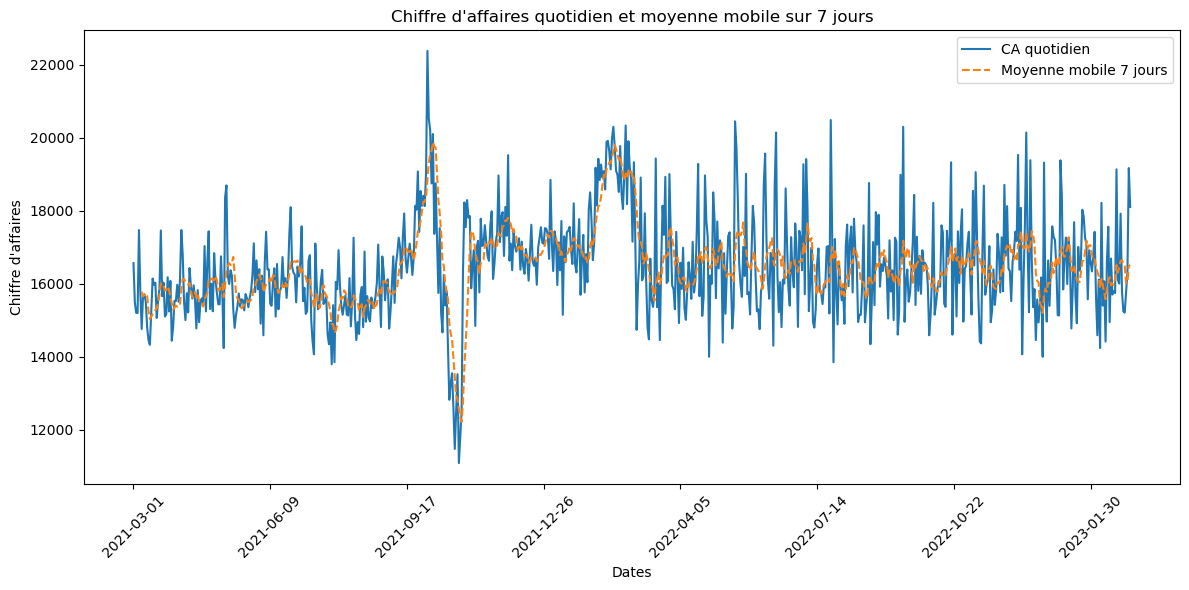

In [404]:
#Courbe d'évolution  du chiffre d'affaires quotidien + moyenne mobile 7 jours
plt.figure(figsize=(12,6))
chiffre_affaires_par_jour.plot(label='CA quotidien')
moyenne_mobile_7j.plot(label='Moyenne mobile 7 jours', linestyle='--')
plt.xticks(rotation=45)
plt.title('Chiffre d\'affaires quotidien et moyenne mobile sur 7 jours')
plt.xlabel('Dates')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.tight_layout()
plt.show()

### **LE CHIFFRE D'AFFAIRES MENSUEL**

In [406]:
#Calcul ca par mois
chiffre_affaires_mensuel = df_ctp.groupby(df_ctp['année_mois_jour'].str[:7])['price'].sum()
chiffre_affaires_mensuel.head()

année_mois_jour
2021-03    482440.61
2021-04    476109.30
2021-05    492943.47
2021-06    484088.56
2021-07    482835.40
Name: price, dtype: float64

In [407]:
#Determination du Ca mensuel moyen
chiffre_affaires_mensuel_moyen = round(chiffre_affaires_mensuel.mean())
print('Le CA mensuel moyen est de', chiffre_affaires_mensuel_moyen, '€.')

Le CA mensuel moyen est de 501153 €.


In [408]:
#Calcul de la moyenne mobile sur 3 mois
moyenne_mobile_3_mois = chiffre_affaires_mensuel.rolling(window=3).mean()
moyenne_mobile_3_mois.head()

année_mois_jour
2021-03              NaN
2021-04              NaN
2021-05    483831.126667
2021-06    484380.443333
2021-07    486622.476667
Name: price, dtype: float64

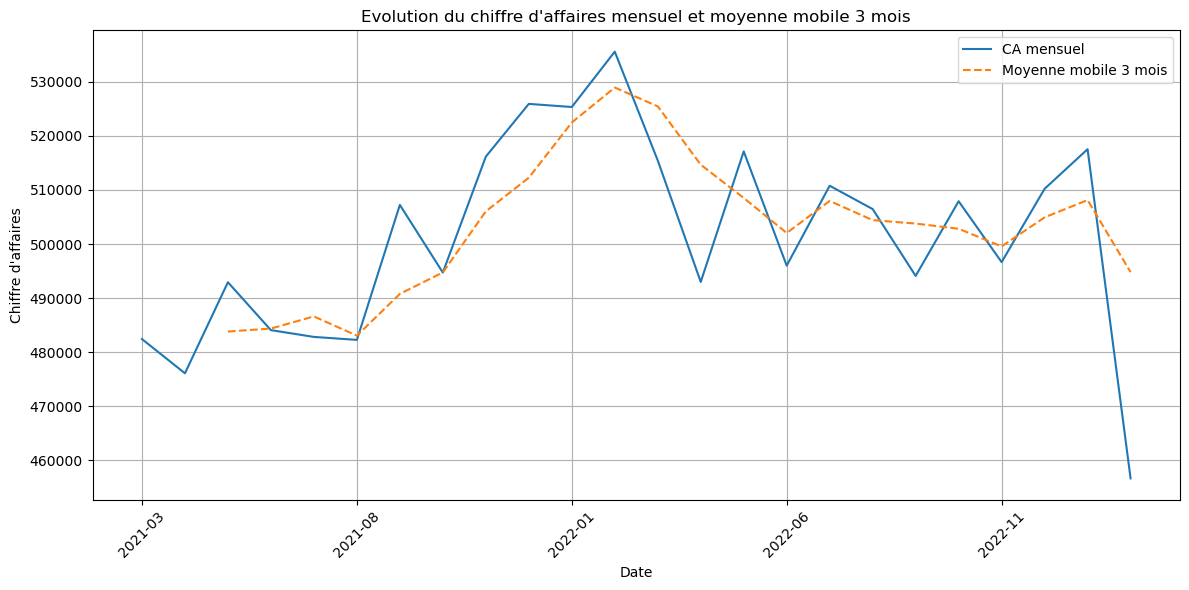

In [409]:
#Graphique de l'évolution du chiffre d'affaires mensuel et la moyenne mobile sur 3 mois.
plt.figure(figsize=(12,6))
chiffre_affaires_mensuel.plot(label='CA mensuel')
moyenne_mobile_3_mois.plot(label='Moyenne mobile 3 mois', linestyle='--')
plt.xticks(rotation=45)
plt.title('Evolution du chiffre d\'affaires mensuel et moyenne mobile 3 mois')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### **LE CHIFFRE D'AFFAIRES PAR CATEGORIES DE PRODUITS**

In [411]:
#Vérification du type donnée de la colonne categ
df_ctp['categ'].dtype

dtype('float64')

In [412]:
#Modification du type de donnée de la colonne categ de décimal à entier
df_ctp['categ'] = df_ctp['categ'].astype(int)
df_ctp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 649814 to 661195
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   client_id        687534 non-null  object        
 1   sex              687534 non-null  object        
 2   birth            687534 non-null  float64       
 3   id_prod          687534 non-null  object        
 4   date             687534 non-null  datetime64[ns]
 5   session_id       687534 non-null  object        
 6   price            687534 non-null  float64       
 7   categ            687534 non-null  int32         
 8   année_mois_jour  687534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 49.8+ MB


In [413]:
#Calcul du chiffre d'affaires par catégories de produit
CA_par_categorie = df_ctp.groupby('categ')['price'].sum()
CA_par_categorie = CA_par_categorie.round(0)
CA_par_categorie.head()

categ
0    4419731.0
1    4827657.0
2    2780275.0
Name: price, dtype: float64

*Il y a 3 catégories de produits 0, 1, et 2. La catégorie 0 a généré 4 419 731 € de ca, la catégorie 1 4 827 657 € et la catégorie 2 2 780 275 €.*

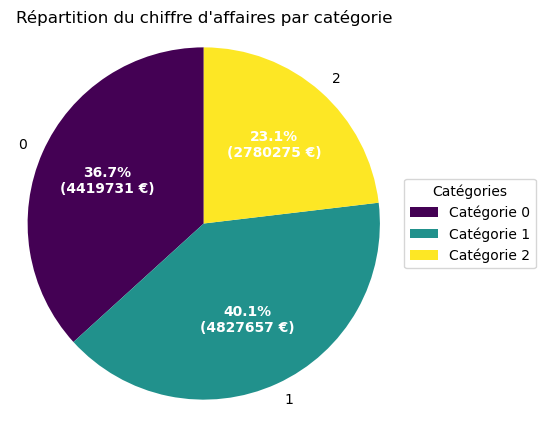

In [415]:
#Représenation graphique de la part dans le CA total de chaque catégorie
labels = [0, 1, 2]
values = CA_par_categorie.loc[labels].values
colors = plt.cm.viridis(np.linspace(0, 1, len(values)))
def autopct_with_ca(pct):
    total = sum(values)
    val = int(round(pct * total / 100))
    return f'{pct:.1f}%\n({val} €)'
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    colors=colors,
    autopct=autopct_with_ca,
    startangle=90
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax.axis('equal')
ax.set_title("Répartition du chiffre d'affaires par catégorie")
ax.legend(wedges, [f'Catégorie {label}' for label in labels], title="Catégories",
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### **L'EVOLUTION DU CHIFFRE D'AFFAIRES MENSUEL PAR CATEGORIES DE PRODUITS**

In [417]:
#Calcul du chiffre d'affaires mensuel
chiffre_affaires_mensuel_par_categories= df_ctp.groupby(['categ', df_ctp['année_mois_jour'].str[:7]])['price'].sum().reset_index()
chiffre_affaires_mensuel_par_categories.head()

,categ,année_mois_jour,price
0,0,2021-03,193629.17
1,0,2021-04,205222.46
2,0,2021-05,196186.72
3,0,2021-06,167943.15
4,0,2021-07,144750.79


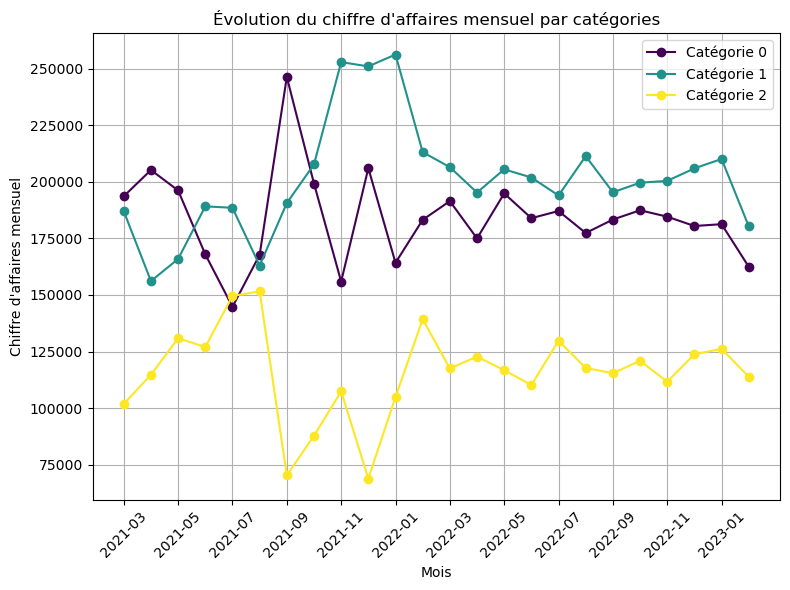

In [418]:
#Réalisation d'un pivot des données pour avoir les mois en index et une colonne par catégorie
pivot_ca_mensuel_par_categ = chiffre_affaires_mensuel_par_categories.pivot(index='année_mois_jour', columns='categ', values='price')
#Représentation graphique de l'évolution du chiffre d'affaires mensuel par catégorie
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(pivot_ca_mensuel_par_categ.columns)))
for i, categorie in enumerate(pivot_ca_mensuel_par_categ.columns):
    ax.plot(pivot_ca_mensuel_par_categ.index, pivot_ca_mensuel_par_categ[categorie], label=f"Catégorie {categorie}", color=colors[i], marker='o')
# Espacer les ticks : un tick tous les 2
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])
ax.set_xticklabels(pivot_ca_mensuel_par_categ.index[::2], rotation=45)
ax.set_xlabel("Mois")
ax.set_ylabel("Chiffre d'affaires mensuel")
ax.set_title("Évolution du chiffre d'affaires mensuel par catégories")
ax.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### **LE CHIFFRE D'AFFAIRES PAR PRODUIT**

In [420]:
#Calcul du chiffre d'affaires par article
ca_par_articles = df_ctp.groupby('id_prod')['price'].sum()
#Calculer la part de chaque article dans le CA total
part_article_dans_ca = round((ca_par_articles / CA_total)*100, 3)
#classer les articles en fonction de l'importance de leur proportion dans le CA 
part_article_dans_ca = part_article_dans_ca.sort_values(ascending=False)
part_article_dans_ca.head()

id_prod
2_159    0.789
2_135    0.576
2_112    0.544
2_102    0.505
2_209    0.474
Name: price, dtype: float64

In [421]:
#Calcul de la part cumulée des articles dans le chiffre d'affaires total 
part_articles_cum = part_article_dans_ca.cumsum()

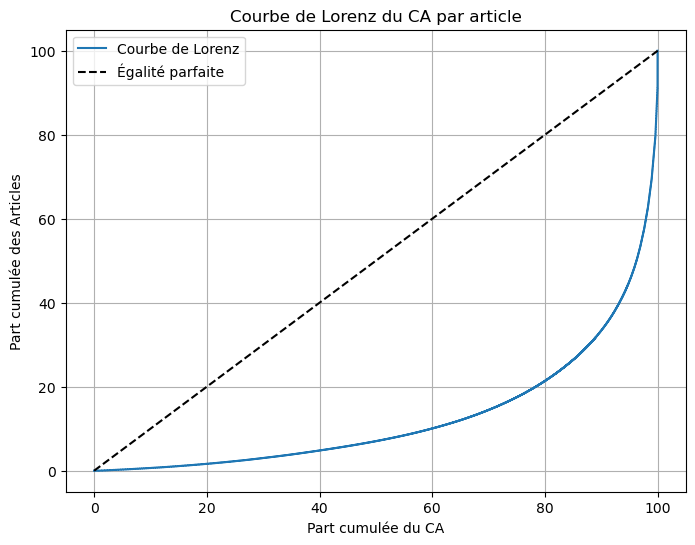

In [422]:
#Courbe de Lorenz du chiffre d'affaires par articles
# Ajouter un zéro au début pour démarrer à (0,0)
part_articles_cum = np.insert(part_articles_cum.values, 0, 0)
# Part cumulée des articles, normalisée de 0 à 100
pop_cumulee = np.linspace(0, 100, len(part_articles_cum))
# Tracer la courbe de Lorenz
plt.figure(figsize=(8,6))
plt.plot( part_articles_cum, pop_cumulee, drawstyle='steps-post', label='Courbe de Lorenz')
plt.plot([0,100], [0,100], 'k--', label='Égalité parfaite')
plt.xlabel("Part cumulée du CA")
plt.ylabel("Part cumulée des Articles")
plt.title("Courbe de Lorenz du CA par article")
plt.legend()
plt.grid(True)
plt.show()

*On observe qu'un peu plus de 20% des articles génèrent 80% du ca.*

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Le Nombre de clients  </h3>
</div>

### **L'EVOLUTION DU NOMBRE DE CLIENTS PAR MOIS**

In [426]:
#Calcul du nombre de client différents sur la période
nb_client_différents = len(df_ctp.client_id.unique())
print('Il y a ', nb_client_différents, 'clients uniques sur la période.')

Il y a  8600 clients uniques sur la période.


In [427]:
#convertir la colonne année_mois_jour au format  datetime
df_ctp['année_mois_jour'] = pd.to_datetime(df_ctp['année_mois_jour'])
#création de la colonne année_mois 
df_ctp['année_mois'] = df_ctp['année_mois_jour'].dt.strftime('%Y-%m')

In [428]:
#Calcul du nombre de client unique par mois
clients_uniques_par_mois = df_ctp.groupby('année_mois')['client_id'].nunique()
clients_uniques_par_mois.head()

année_mois
2021-03    5676
2021-04    5674
2021-05    5644
2021-06    5659
2021-07    5672
Name: client_id, dtype: int64

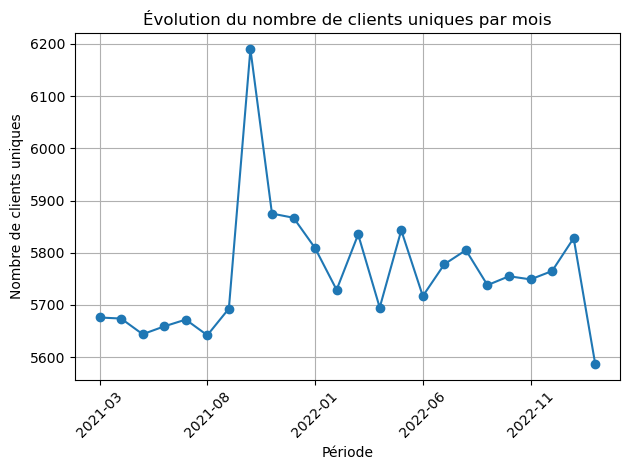

In [429]:
#Graphique de l'évolution du nombre de client uniques par mois
clients_uniques_par_mois.plot(kind='line', marker='o')
plt.title("Évolution du nombre de clients uniques par mois")
plt.xlabel("Période")
plt.ylabel("Nombre de clients uniques")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [430]:
#Affichage des valeurs pour les clients uniques mensuels
clients_uniques_par_mois.describe()

count      24.000000
mean     5759.375000
std       120.386628
min      5587.000000
25%      5675.500000
50%      5743.500000
75%      5813.750000
max      6190.000000
Name: client_id, dtype: float64

*Au minimum il y a eu 5587 clients différents par mois qui ont réalisé des achats , et 6190 au maximum.*
*En moyenne, il y a eu 5759 clients par mois sur la période.*

In [432]:
#Calcul du nombre médian de clients unique par mois
nb_median_clients_mensuel = round(df_ctp.groupby('année_mois')['client_id'].nunique().median())
print('Le nombre médian de clients mensuels sur la période est de', nb_median_clients_mensuel, '.')

Le nombre médian de clients mensuels sur la période est de 5744 .


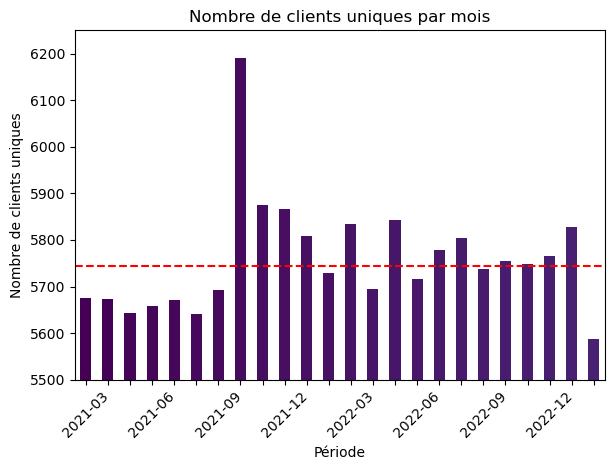

In [433]:
#Distribution du nombre de clients uniques par mois et nombre médian de clients uniques.
clients_uniques_par_mois.plot(kind='bar', color=plt.cm.viridis(range(len(clients_uniques_par_mois))))
plt.axhline(y=nb_median_clients_mensuel, color='red', linestyle='--', label=f'Médiane = {int(nb_median_clients_mensuel)}')
plt.title("Nombre de clients uniques par mois")
plt.xlabel("Période")
plt.ylabel("Nombre de clients uniques")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(5500, 6250)
ax = plt.gca()
labels = ax.get_xticklabels()
for i, label in enumerate(labels):
    if i % 3 != 0:
        label.set_visible(False)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Le Nombre de transactions  </h3>
</div>

In [435]:
#Calcul du nombre transactions
nb_transactions_totales = df_ctp['id_prod'].count()
print('Il y a eu', nb_transactions_totales, 'transactions sur la période.')

Il y a eu 687534 transactions sur la période.


In [436]:
#Calcul du nombre de transactions par mois
nb_transactions_mensuelles = df_ctp.groupby('année_mois')['id_prod'].count()
nb_transactions_mensuelles.head()

année_mois
2021-03    28601
2021-04    28443
2021-05    28285
2021-06    26850
2021-07    24738
Name: id_prod, dtype: int64

In [437]:
#Affichage des valeurs pour les nombres de transactions mensuelless
nb_transactions_mensuelles.describe()

count       24.000000
mean     28647.250000
std       1879.723621
min      24738.000000
25%      28300.750000
50%      28582.000000
75%      29405.750000
max      33314.000000
Name: id_prod, dtype: float64

*Il y a eu au minimum 24 738 transactions mensuelles et 33 314 au maximum sur la période.*
*Le nombre moyen de transactions mensuelles s'élèvent à 28 647.*

In [439]:
#Calcul de la moyenne mobile sur 3 mois
moyenne_mobile_3_mois_transactions= nb_transactions_mensuelles.rolling(window=3).mean()
moyenne_mobile_3_mois_transactions.head()

année_mois
2021-03             NaN
2021-04             NaN
2021-05    28443.000000
2021-06    27859.333333
2021-07    26624.333333
Name: id_prod, dtype: float64

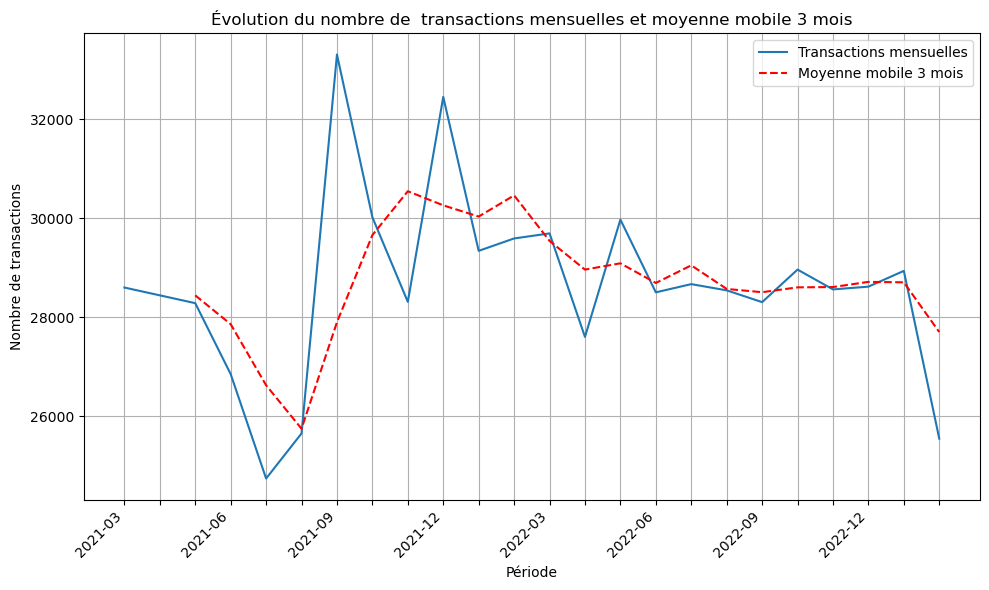

In [440]:
#Evolution du nombre de transactions mensuelles
plt.figure(figsize=(10,6))
# Tracer la courbe du nombre de transactions mensuelles
plt.plot(nb_transactions_mensuelles.index, nb_transactions_mensuelles.values, label='Transactions mensuelles')
# Tracer la moyenne mobile 3 mois
plt.plot(moyenne_mobile_3_mois_transactions.index, moyenne_mobile_3_mois_transactions.values, label='Moyenne mobile 3 mois', linestyle='--', color='red')
plt.title("Évolution du nombre de  transactions mensuelles et moyenne mobile 3 mois")
plt.xlabel("Période")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45, ha='right')
# pour alléger les labels x
ax = plt.gca()
labels = ax.get_xticklabels()
for i, label in enumerate(labels):
    if i % 3 != 0:
        label.set_visible(False)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - Le Nombre de produits différents vendus  </h3>
</div>

In [442]:
#Nombre d'articles uniques vendu par mois
df_articles_uniques_mois = df_ctp.groupby('année_mois')['id_prod'].nunique().reset_index()
df_articles_uniques_mois.rename(columns={'id_prod': 'nombre_articles_uniques'}, inplace=True)
df_articles_uniques_mois.head()

,année_mois,nombre_articles_uniques
0,2021-03,2482
1,2021-04,2492
2,2021-05,2471
3,2021-06,2414
4,2021-07,2369


In [443]:
#Moyenne, minimum et maximum
df_articles_uniques_mois.describe()

,nombre_articles_uniques
count,24.000000
mean,2462.875000
std,39.792191
min,2369.000000
25%,2445.500000
50%,2470.000000
75%,2485.750000
max,2560.000000


*Il y a eu en moyenne 2463 articles différents vendus par mois, avec un minimum de 2369 articles et un maximum de 3286 articles.* 

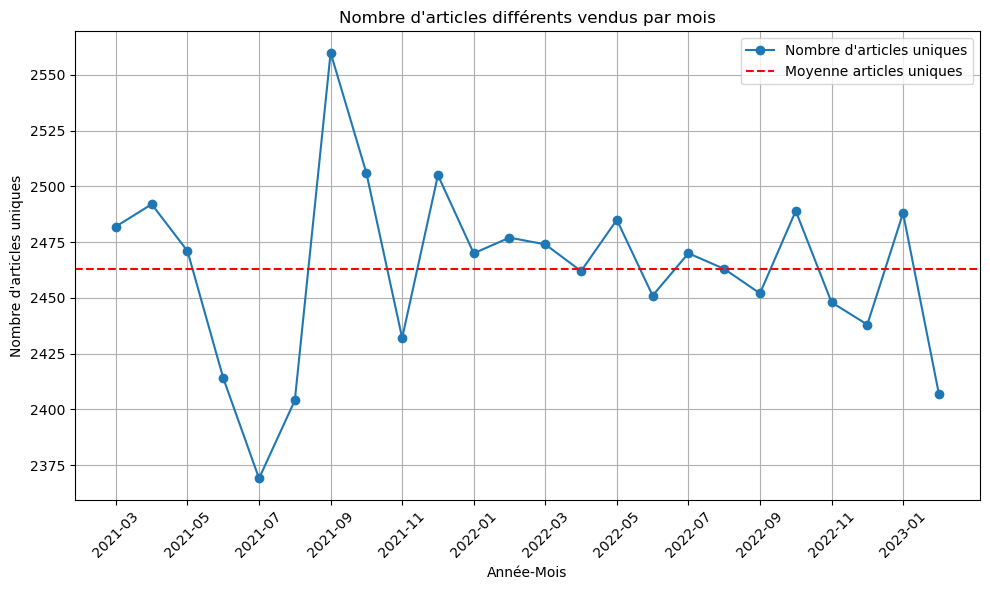

In [445]:
#Courbe d'évolution du nombre de produits différents vendus par mois et moyennne.
moyenne = df_articles_uniques_mois['nombre_articles_uniques'].mean()
plt.figure(figsize=(10,6))
plt.plot(df_articles_uniques_mois['année_mois'], df_articles_uniques_mois['nombre_articles_uniques'], marker='o', label='Nombre d\'articles uniques')
plt.axhline(y=moyenne, color='r', linestyle='--', label='Moyenne articles uniques')
plt.title('Nombre d\'articles différents vendus par mois')
plt.xlabel('Année-Mois')
plt.ylabel('Nombre d\'articles uniques')
dates = df_articles_uniques_mois['année_mois']
plt.xticks(dates[::2], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### **LES 10 ARTICLES LES PLUS VENDUS**

In [447]:
#Comptabilisation du nombre de transactions par produits
df_ctp['id_prod'].value_counts()

id_prod
1_369     2340
1_417     2269
1_414     2246
1_498     2202
1_425     2163
          ... 
0_1379       1
0_886        1
0_1601       1
0_541        1
0_1633       1
Name: count, Length: 3265, dtype: int64

In [448]:
#Determination du top 10 des articles les plus vendus.
top_10_produits_les_plus_vendus = df_ctp['id_prod'].value_counts()[:10]
top_10_produits_les_plus_vendus

id_prod
1_369    2340
1_417    2269
1_414    2246
1_498    2202
1_425    2163
1_403    2040
1_413    2036
1_412    2014
1_406    2003
1_407    2001
Name: count, dtype: int64

In [449]:
#Nombre total d'articles vendus pour le top 10.
total_articles_top10 = top_10_produits_les_plus_vendus.sum()
#Calcul de la part du top 10 dans le total des produits vendus
proportion_top10_total_articles_vendus = round((total_articles_top10 / nb_transactions_totales)*100, 3)
print('Les articles du top 10 comptablisent', total_articles_top10, 'ventes soit', proportion_top10_total_articles_vendus,'% de la totalité des produits vendus.')

Les articles du top 10 comptablisent 21314 ventes soit 3.1 % de la totalité des produits vendus.


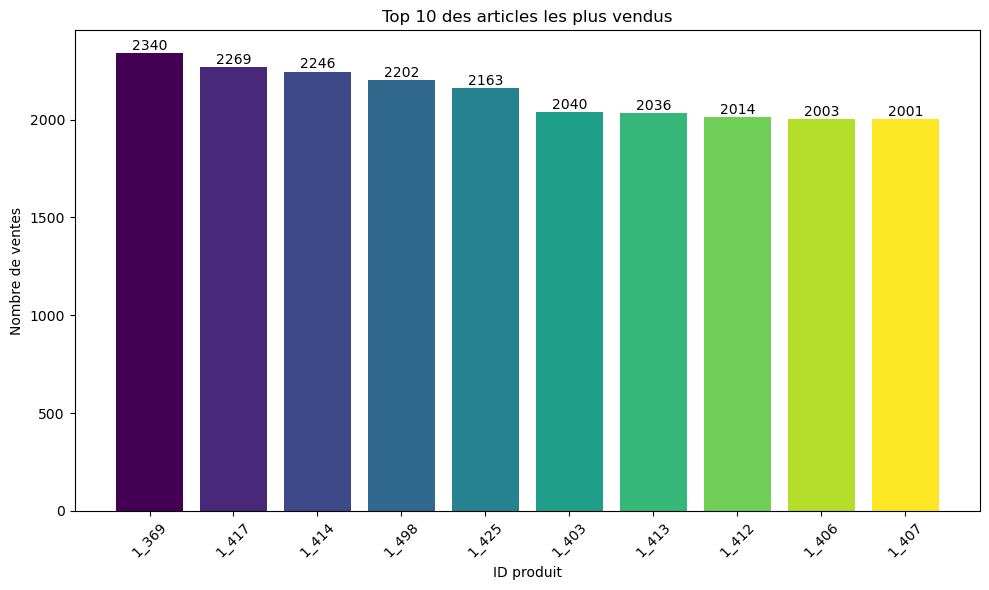

In [450]:
#Graphique du Top 10 des articles les plus vendus
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(top_10_produits_les_plus_vendus)))
bars = ax.bar(top_10_produits_les_plus_vendus.index.astype(str), top_10_produits_les_plus_vendus.values, color=colors)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', ha='center', va='bottom')
ax.set_title('Top 10 des articles les plus vendus')
ax.set_xlabel('ID produit')
ax.set_ylabel('Nombre de ventes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **LES 10 ARTICLES LES MOINS VENDUS**

In [452]:
#Identification des articles les moins vendus
df_ctp['id_prod'].value_counts(ascending=True)

id_prod
0_1633       1
0_1601       1
0_1151       1
0_1539       1
0_541        1
          ... 
1_425     2163
1_498     2202
1_414     2246
1_417     2269
1_369     2340
Name: count, Length: 3265, dtype: int64

In [453]:
# Compter les ventes par produit
counts = df_ctp['id_prod'].value_counts()
# Récupérer l'index des produits vendus une seule fois
produits_1_vente = counts[counts == 1].index
# Filtrer le DataFrame initial pour ne garder que ces produits
df_produits_1_vente = df_ctp.loc[df_ctp['id_prod'].isin(produits_1_vente)]
# Trier par prix croissant (moins générateur de CA)
df_produits_1_vente_tries = df_produits_1_vente.sort_values(by='price', ascending=True)
# Sélection des 10 premiers produits
les_10_produits_les_moins_vendus = df_produits_1_vente_tries.head(10)
# Affichage du résultat
les_10_produits_les_moins_vendus

,client_id,sex,birth,id_prod,date,session_id,price,categ,année_mois_jour,année_mois
252566,c_881,f,1988.0,0_1539,2021-06-01 08:53:24.523722,s_42501,0.99,0,2021-06-01,2021-06
85498,c_1551,m,1972.0,0_1284,2021-04-14 13:13:06.560397,s_20477,1.38,0,2021-04-14,2021-04
286078,c_1125,f,1972.0,0_1601,2021-03-07 18:55:24.042724,s_3132,1.99,0,2021-03-07,2021-03
407783,c_8273,m,1991.0,0_807,2021-07-24 17:43:23.555852,s_66634,1.99,0,2021-07-24,2021-07
399059,c_1869,f,1985.0,0_541,2021-03-08 23:45:11.524853,s_3676,1.99,0,2021-03-08,2021-03
318187,c_2768,f,1989.0,0_1728,2021-04-19 13:48:18.949260,s_22772,2.27,0,2021-04-19,2021-04
231575,c_1938,f,1979.0,0_1498,2022-02-19 08:31:04.439133,s_167516,2.48,0,2022-02-19,2022-02
399562,c_4202,f,1987.0,0_549,2021-04-11 04:42:10.308957,s_18930,2.99,0,2021-04-11,2021-04
51555,c_2103,f,1973.0,0_1151,2021-09-17 05:58:49.213439,s_91113,2.99,0,2021-09-17,2021-09
408314,c_8260,m,1991.0,0_833,2021-09-27 23:22:40.394509,s_96558,2.99,0,2021-09-27,2021-09


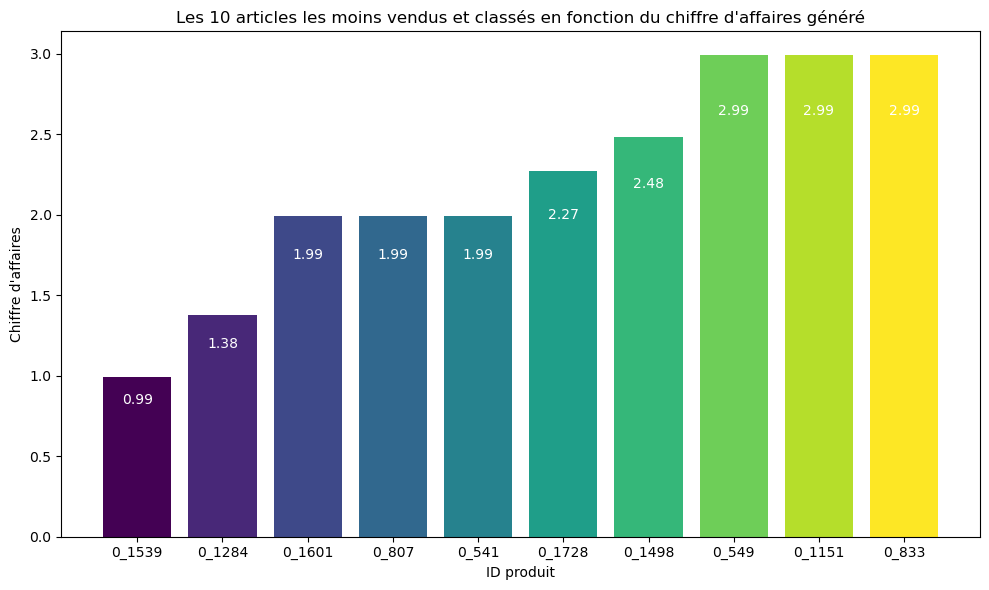

In [454]:
#Graphique des 10 articles les moins vendus
# Préparer les valeurs à afficher : les id_prod en x, prix en y
ids = les_10_produits_les_moins_vendus['id_prod'].astype(str)
prix = les_10_produits_les_moins_vendus['price']
fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(prix)))
bars = ax.bar(ids, prix, color=colors)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height - height*0.1,
        f'{height:.2f}',
        ha='center',
        va='top',
        color='white'
    )
ax.set_title("Les 10 articles les moins vendus et classés en fonction du chiffre d'affaires généré")
ax.set_xlabel('ID produit')
ax.set_ylabel("Chiffre d'affaires")
plt.xticks()
plt.tight_layout()
plt.show()

### **LES ARTICLES VENDUS PAR CATEGORIE**

In [456]:
#nb de ventes par catégorie
nb_produits_vendus_par_categorie = df_ctp.groupby('categ').size().reset_index(name='nombre_ventes')
nb_produits_vendus_par_categorie

,categ,nombre_ventes
0,0,415459
1,1,235592
2,2,36483


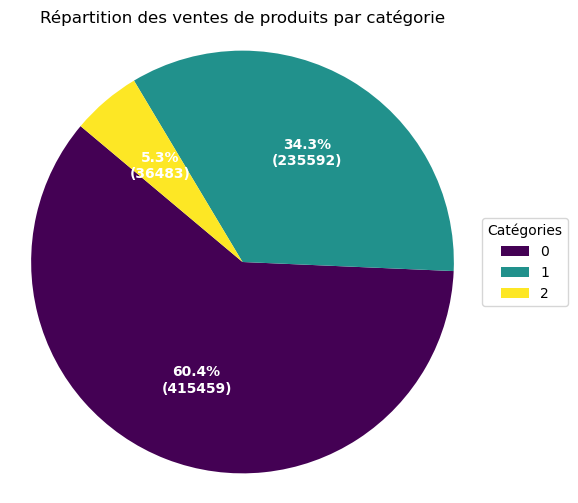

In [457]:
#Représentation graphique de la part de chaque catégorie dans les ventes totales
labels = nb_produits_vendus_par_categorie['categ']
sizes = nb_produits_vendus_par_categorie['nombre_ventes']
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(labels)))
def autopct_format(pct):
    total = sum(sizes)
    count = int(round(pct * total / 100))
    return f'{pct:.1f}%\n({count})'
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=autopct_format,
    textprops={'color': 'white', 'weight': 'bold'},
    startangle=140
)
plt.title('Répartition des ventes de produits par catégorie')
plt.axis('equal')
plt.legend(labels, title='Catégories', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### **IDENTIFICATIONS DES CLIENTS B TO B**

In [459]:
#Classement des 10 clients ayant générés le plus de chiffre d'affaires
ca_par_client = df_ctp.groupby('client_id')['price'].sum().sort_values(ascending=False)
top_10_clients_ca= ca_par_client.head(10)
top_10_clients_ca

client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
c_3263      5276.87
c_2140      5260.18
c_2899      5214.05
c_7319      5155.77
c_7959      5135.75
Name: price, dtype: float64

*Il y a 4 clients qui ont réalisé des montants d'achats bien supérieurs au reste des 10 plus gros clients en matière de CA généré , il s'agit sans doute de clients B to B.*

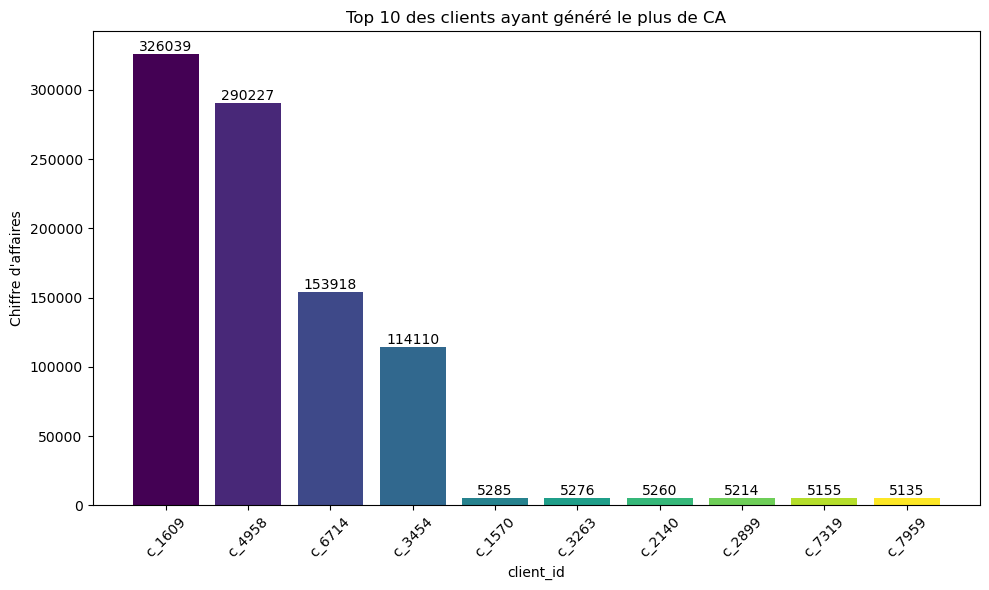

In [461]:
#Graphique des 10 clients ayant généré le plus de chiffres d'affaires
fig, ax = plt.subplots(figsize=(10, 6))
# Couleurs avec la palette viridis
colors = cm.viridis(np.linspace(0, 1, len(top_10_clients_ca)))
bars = ax.bar(top_10_clients_ca.index.astype(str), top_10_clients_ca.values, color=colors)
# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', ha='center', va='bottom')
ax.set_title("Top 10 des clients ayant généré le plus de CA")
ax.set_xlabel('client_id')
ax.set_ylabel("Chiffre d'affaires")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [462]:
#Classement des 10 clients ayant acheté le plus de produits
nb_articles_par_client = df_ctp.groupby('client_id').size().sort_values(ascending=False)
top_10_clients_articles = nb_articles_par_client.head(10)
top_10_clients_articles

client_id
c_1609    25586
c_6714     9199
c_3454     6793
c_4958     5222
c_2140      405
c_3263      403
c_2595      398
c_2077      386
c_1637      384
c_7421      381
dtype: int64

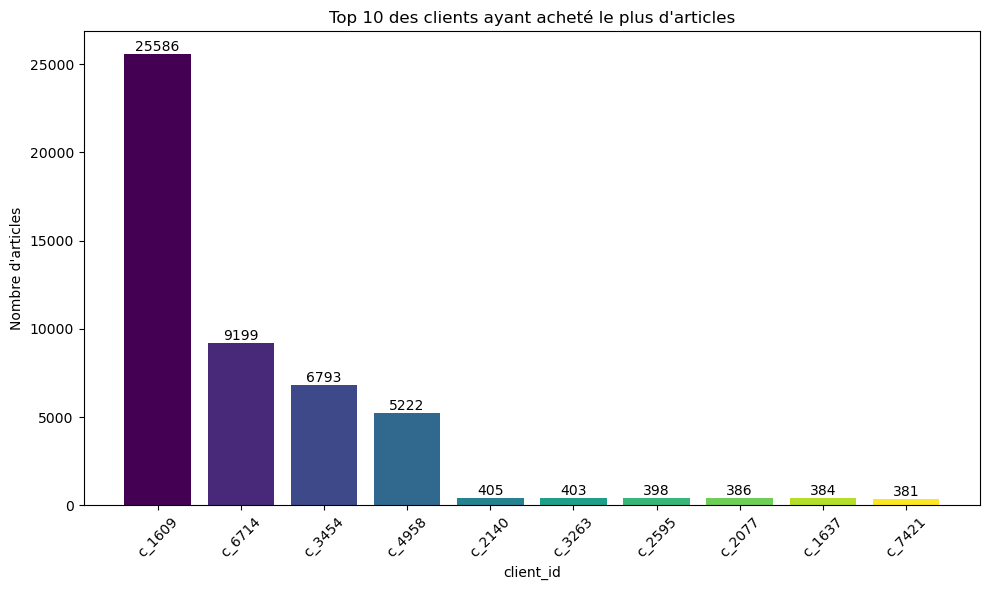

In [463]:
#Graphiques des 10 clients ayant acheté les plus d'articles.
fig, ax = plt.subplots(figsize=(10, 6))
# Couleurs avec la palette viridis
colors = cm.viridis(np.linspace(0, 1, len(top_10_clients_articles)))
bars = ax.bar(top_10_clients_articles.index.astype(str), top_10_clients_articles.values, color=colors)
# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', ha='center', va='bottom')
ax.set_title("Top 10 des clients ayant acheté le plus d'articles")
ax.set_xlabel('client_id')
ax.set_ylabel("Nombre d'articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*On retrouve les 4 clients qui ont généré les plus hauts montants d'achats totaux comme étant ceux qui ont achetés le plus d'articles en quantités.*

In [465]:
#Nombres total de produits achétés par le top 10
top_10_clients_articles.sum()
print('Les clients du Top 10 ont acheté', top_10_clients_articles.sum(), 'produits au total.')

Les clients du Top 10 ont acheté 49157 produits au total.


In [466]:
#Proportion de produits acheté par les clients top 10 dans le total de produits vendus
proportion_top_10_clients_total_articles = (top_10_clients_articles.sum() / nb_transactions_totales) *100
print('Les produits achetés par les clients du top 10 représentent', round(proportion_top_10_clients_total_articles, 3), '% du total des produits vendus.')

Les produits achetés par les clients du top 10 représentent 7.15 % du total des produits vendus.


In [467]:
#Calcul du nombre d'articles achetés par les clients du top 4 (btob)
top_4_clients_articles = top_10_clients_articles.head(4).sum()
print('Les 4 plus gros clients ont acheté', top_4_clients_articles, 'produits au total.')

Les 4 plus gros clients ont acheté 46800 produits au total.


In [468]:
proportion_top_4_clients_total_articles = (top_4_clients_articles / nb_transactions_totales)*100
print('Les produits achetés par les 4 plus gros clients  représentent', round(proportion_top_4_clients_total_articles, 1), '% du total des prosuits vendus.')

Les produits achetés par les 4 plus gros clients  représentent 6.8 % du total des prosuits vendus.


In [469]:
#Importance du top 4 dans le Top 10
proportion_top_4_clients_top10_articles = (top_4_clients_articles / top_10_clients_articles.sum())*100
print('Les produits achetés par les 4 plus gros clients representent', round(proportion_top_4_clients_top10_articles, 1), '% des produits achetés par les clients du Top 10.')

Les produits achetés par les 4 plus gros clients representent 95.2 % des produits achetés par les clients du Top 10.


In [470]:
#Part des clients btob dans le chiffre d'affaires total
ca_client_btob = ca_par_client.head(4).sum()
proportion_btob = (ca_client_btob / CA_total)*100
print("Le chiffre d'affaires généré par les 4 plus gros clients représente", round(proportion_btob, 1), "% du CA total.")

Le chiffre d'affaires généré par les 4 plus gros clients représente 7.4 % du CA total.


In [471]:
#Chiffre d'affaires total générés par les clients du top 10
print('Les clients du top 10 ont généré', round(top_10_clients_ca.sum()), '€ de CA.')

Les clients du top 10 ont généré 915625 € de CA.


In [472]:
#Proportion du chiffre d'affaire du top 10 clients dans le chiffre d'affaires total
proportion_Top_10_ca_total = (top_10_clients_ca.sum() / CA_total)*100
print("Le chiffre d'affaires des clients du Top 10 représente", round(proportion_Top_10_ca_total, 1), '% du CA total.')

Le chiffre d'affaires des clients du Top 10 représente 7.6 % du CA total.


In [473]:
#Proportion du chiffre d'affaires des clients btob dans le chiffre d'affaires généré par les clients du top 10
proportion_btob_dans_top10_ca = (ca_client_btob / top_10_clients_ca.sum())*100
total_proportion_btob = round(proportion_btob_dans_top10_ca.sum(), 1)
print("Le chiffre d'affaires total des 4 plus gros clients représente", total_proportion_btob, "% du CA généré par les clients du Top 10.")

Le chiffre d'affaires total des 4 plus gros clients représente 96.6 % du CA généré par les clients du Top 10.


### **COURBE DE LORENTZ DU CHIFFRE D'AFFAIRE ET DE LA PART DES CLIENTS**

In [475]:
#Calculer la part de chaque client dans le CA total
part_client_dans_ca = round((ca_par_client / CA_total)*100, 3)
part_client_dans_ca.sort_values(inplace = True)
part_client_dans_ca.head()

client_id
c_8351    0.0
c_1232    0.0
c_1908    0.0
c_4679    0.0
c_180     0.0
Name: price, dtype: float64

In [476]:
#Calculer la part cumulé des clients dans le chiffre d'affaires total
part_client_cum = part_client_dans_ca.cumsum()
part_client_cum.head()

client_id
c_8351    0.0
c_1232    0.0
c_1908    0.0
c_4679    0.0
c_180     0.0
Name: price, dtype: float64

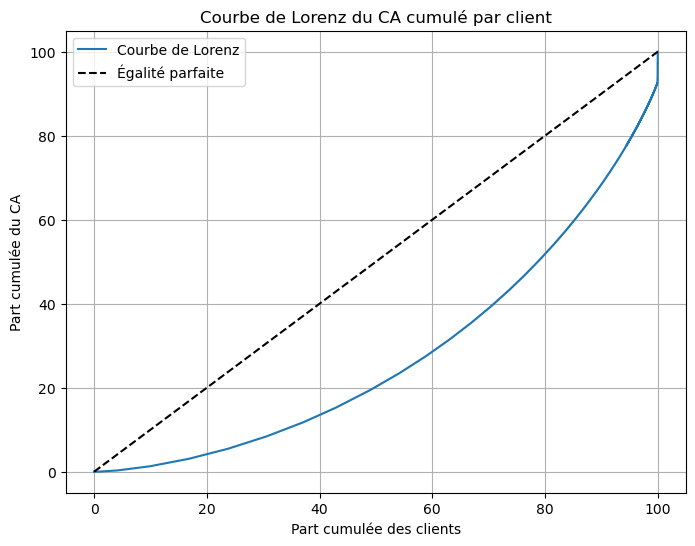

In [477]:
#Représentation de la courbe de Lorenz concernant les clients et le chiffre d'affaires 
# Ajouter un zéro au début pour démarrer à (0,0)
part_client_cum = np.insert(part_client_cum, 0, 0)
# Part cumulée des clients, normalisée de 0 à 100
pop_client_cumulee = np.linspace(0, 100, len(part_client_cum))
# Tracer la courbe de Lorenz
plt.figure(figsize=(8,6))
plt.plot(pop_client_cumulee, part_client_cum, drawstyle='steps-post', label='Courbe de Lorenz')
plt.plot([0,100], [0,100], 'k--', label='Égalité parfaite')
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du CA")
plt.title("Courbe de Lorenz du CA cumulé par client")
plt.legend()
plt.grid(True)
plt.show()

*On observe que 80% des clients génèrent 50% du ca et qu'une infime partie des clients génère quasiement 10% du chiffre d'affaires.*

### **TRAITEMENT DES CLIENTS B TO B POUR LA SUITE DE L'ANALYSE**

In [480]:
# Identifier les clients avec un CA > 100 000
clients_haut_ca = ca_par_client[ca_par_client > 100000].index
clients_haut_ca

Index(['c_1609', 'c_4958', 'c_6714', 'c_3454'], dtype='object', name='client_id')

In [481]:
# Filtrer le DataFrame pour exclure ces clients
df_ctp_filtré_sans_btob = df_ctp[~df_ctp['client_id'].isin(clients_haut_ca)]

In [482]:
#Extraire le dataframe au format .pkl
df_ctp_filtré_sans_btob.to_pickle('df_sans_btob.pkl')